# Problem 1

Author of solution: 房伯文

### Numerical calculation of vibration frequency

/tmp/ipykernel_4951/561949857.py:13: RuntimeWarning: divide by zero encountered in divide
  D = a/R - (1+a/R) * np.exp(-2*R/a)
/tmp/ipykernel_4951/561949857.py:13: RuntimeWarning: invalid value encountered in subtract
  D = a/R - (1+a/R) * np.exp(-2*R/a)
/tmp/ipykernel_4951/561949857.py:16: RuntimeWarning: divide by zero encountered in divide
  return -(1+2*(D+X)/(1+I)-2*a/R)


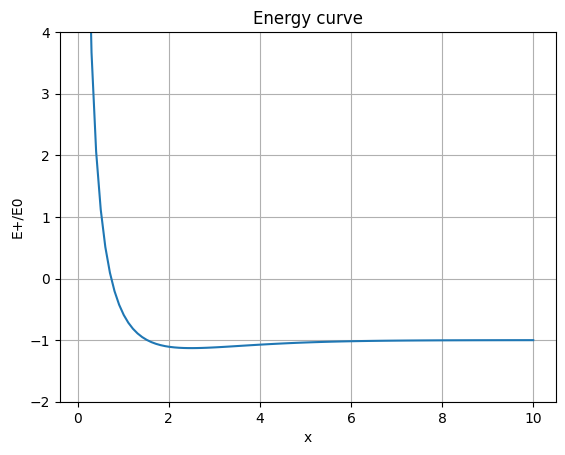

minimum R (in unit of Bohr radius): 2.4928299101724543
k: 97.74045188992878
frequency (omega): 341863926673433.0
quantum energy: 0.2250413518881953


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
%matplotlib inline

a = 1  # Use the Bohr radius as a unit.
a0 = 5.29177210903e-11
E0 = 2.178e-18  # 13.6eV
mp = 1.67262192369e-27  # proton mass (kg)
mu = mp / 2  # reduced mass of H2+ (kg)

def E_plus(R):
    D = a/R - (1+a/R) * np.exp(-2*R/a)
    X = (1+R/a) * np.exp(-R/a)
    I = 1/3 * (R**2/a**2+3*R/a+3) * np.exp(-R/a)
    return -(1+2*(D+X)/(1+I)-2*a/R)

x = np.linspace(0, 10, 100)
y = E_plus(x)

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("E+/E0")
plt.ylim(-2,4)
plt.title("Energy curve")
plt.grid(True)
# plt.figure(figsize=(8, 10))
plt.show()

# === Get the min value of E and the corresponding R ===
min_res = minimize_scalar(E_plus, bounds=(1, 4), method='bounded')

# print(min_res)

Re = min_res.x
print("minimum R (in unit of Bohr radius):", Re)
h = 3e-4  # delta, for 2nd order derivative

E_1 = E_plus(Re-h)
E_2 = E_plus(Re)
E_3 = E_plus(Re+h)

# print("energies:",E_1, E_2, E_3)
k = (E_3-2*E_2+E_1)*E0/(h*a0)**2
print("k:", k)

omega = np.sqrt(k/mu)
print("frequency (omega):", omega)

hplank = 6.626e-34
hbar = hplank/(2*np.pi)
convert = 1.602e-19
energy = hbar*omega / convert
print("quantum energy:", energy)